In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

(50, 4, 4)


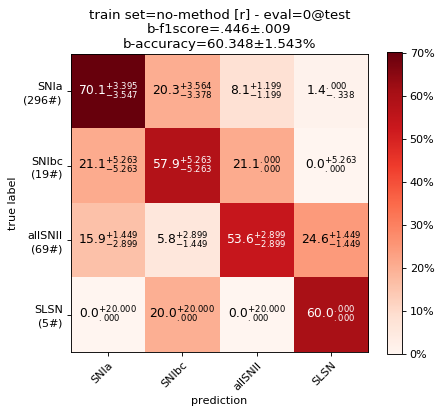

(50, 4, 4)


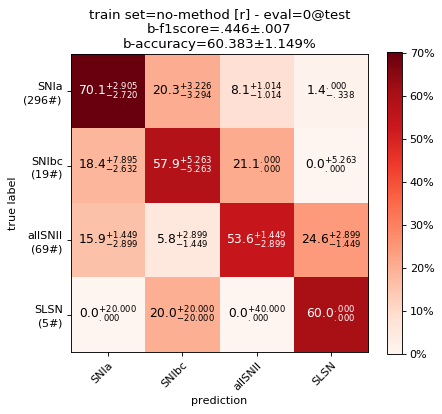

(50, 4, 4)


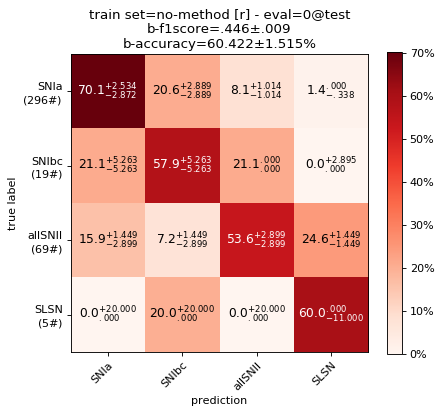

(50, 4, 4)


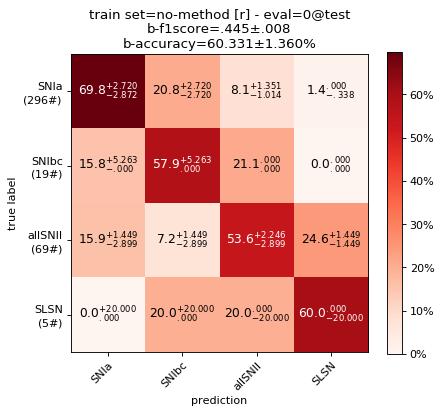

(50, 4, 4)


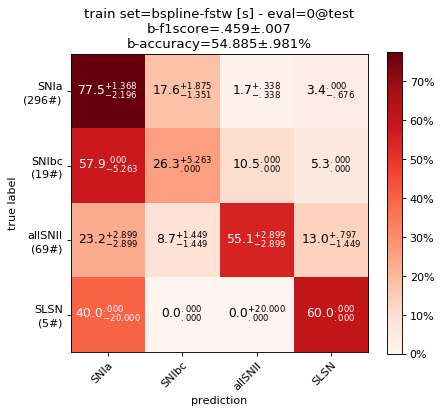

(50, 4, 4)


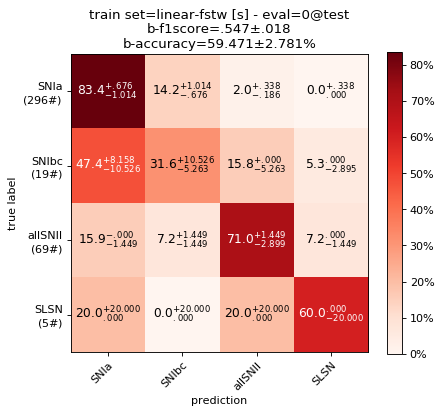

(50, 4, 4)


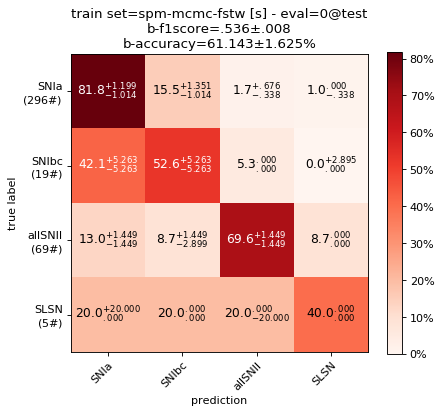

(50, 4, 4)


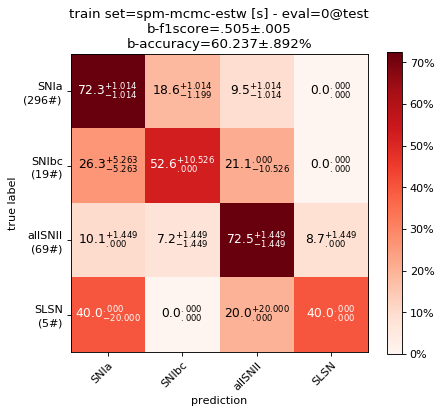

(50, 4, 4)


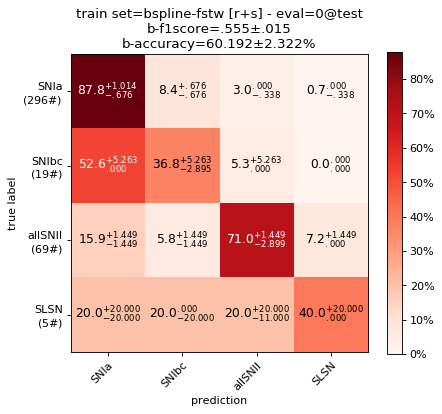

(50, 4, 4)


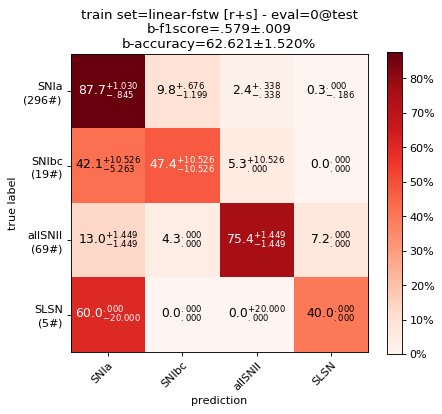

(50, 4, 4)


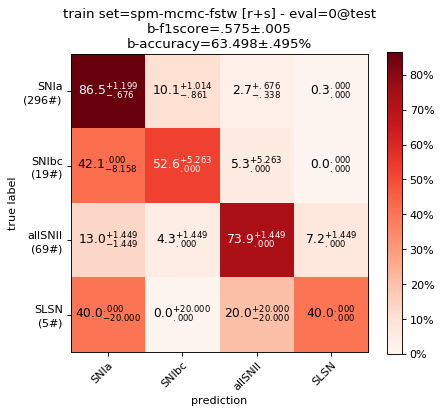

(50, 4, 4)


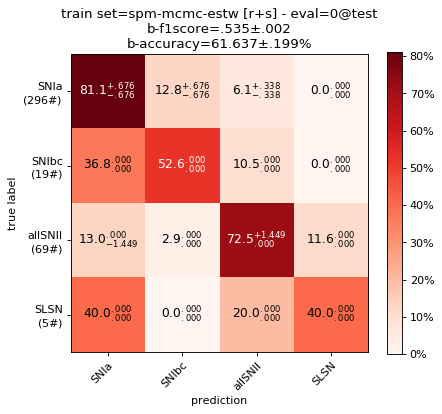

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import search_for_filedirs, gather_files_by_kfold
from flamingchoripan.cuteplots.cm_plots import plot_custom_confusion_matrix
import matplotlib.pyplot as plt
from flamingchoripan.datascience.xerror import XError

methods = [
    'bspline-fstw',
    'linear-fstw',
    #'spm-mle-fstw',
    'spm-mcmc-fstw',
    #'spm-mle-estw',
    'spm-mcmc-estw',
]
#methods = ['spm-mcmc-estw']
eval_lcset_name = 'test' # val test
kf = '0'

for train_config in ['r', 's', 'r+s']:
    for method in methods:
        rootdir = f'../save/exp=rf_eval~train_config={train_config}/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
        files, files_ids = gather_files_by_kfold(rootdir, kf, eval_lcset_name)
        class_names = files[0]()['lcset_info']['class_names']
        cms = np.concatenate([f()['cm'][None] for f in files], axis=0)
        f1score_xe = XError([f()['metrics_dict']['b-f1score'] for f in files])
        accuracy_xe = XError([f()['metrics_dict']['b-accuracy'] for f in files])
        print(cms.shape)

        ### plot cm
        _title = 'no-method [r]' if train_config=='r' else f'{method} [{train_config}]'
        title = ''
        title += f'train set={_title} - eval={kf}@{eval_lcset_name}'+'\n'
        title += f'b-f1score={f1score_xe}'+'\n'
        title += f'b-accuracy={accuracy_xe}%'+'\n'
        cm_kwargs = {
            'title':title[:-1],
            'figsize':(6,5),
            'new_order_classes':['SNIa', 'SNIbc', 'allSNII', 'SLSN'],
        }
        fig, ax = plot_custom_confusion_matrix(cms, class_names, **cm_kwargs)
        plt.show()

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.datascience.xerror import XError
from flamingchoripan.dataframes import DFBuilder
from flamingchoripan.latex.latex_tables import LatexTable

metrics = [
    'b-accuracy',
    'b-f1score',
    'b-gmean',
    #'b-dpower',
    'b-xentropy',
]
info_df = DFBuilder()
for metric in metrics:
    for train_config in ['r', 's', 'r+s']:
        d = {}
        for method in methods:
            rootdir = f'../save/exp=rf_eval~train_config={train_config}/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
            files, files_ids = gather_files_by_kfold(rootdir, kf, eval_lcset_name)
            metric_xe = XError([f()['metrics_dict'][metric] for f in files])
            d[method] = metric_xe

        info_df.append(f'metric={metric} [{train_config}]', d)
        
latex_kwargs = {
    'caption':f'eval={kf}@{eval_lcset_name}',
    'label':'?',
    #'bold_criteriums':'max',
    'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    'hline_k':2,
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)
print('% \multicolumn{3}{c|}{}')
info_df()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\def\srule{\rule{0pt}{2ex}\rule[-1ex]{0pt}{0ex}}
\begin{table*}
\centering
\caption{eval=0@test}
\label{?}\vspace{.1cm}
\begin{tabular}{l|ccc|c}
\hline
metric & bspline-fstw & linear-fstw & spm-mcmc-fstw & spm-mcmc-estw \srule\\\hline\hline
b-accuracy [r] & 60.348$\pm$1.543 & 60.383$\pm$1.149 & 60.422$\pm$1.515 & 60.331$\pm$1.360  \srule\\
b-accuracy [s] & 54.885$\pm$.981 & 59.471$\pm$2.781 & 61.143$\pm$1.625 & 60.237$\pm$.892  \srule\\
b-accuracy [r+s] & 60.192$\pm$2.322 & 62.621$\pm$1.520 & 63.498$\pm$.495 & 61.637$\pm$.199  \srule\\
\hline
b-f1score [r] & .446$\pm$.009 & .446$\pm$.007 & .446$\pm$.009 & .445$\pm$.008  \srule\\
b-f1score [s] & .459$\pm$.007 & .547$\pm$.018 & .536$\pm$.008 & .505$\pm$.005  \srule\\
b-f1score [r+s] & .555$\pm$.015 & .579$\pm$.009 & .575$\pm$.005 & .535$\pm$.002  \srul

,bspline-fstw,linear-fstw,spm-mcmc-fstw,spm-mcmc-estw
metric=b-accuracy [r],60.348±1.543,60.383±1.149,60.422±1.515,60.331±1.360
metric=b-accuracy [s],54.885±.981,59.471±2.781,61.143±1.625,60.237±.892
metric=b-accuracy [r+s],60.192±2.322,62.621±1.520,63.498±.495,61.637±.199
metric=b-f1score [r],.446±.009,.446±.007,.446±.009,.445±.008
metric=b-f1score [s],.459±.007,.547±.018,.536±.008,.505±.005
metric=b-f1score [r+s],.555±.015,.579±.009,.575±.005,.535±.002
metric=b-gmean [r],.727±.011,.727±.008,.727±.011,.726±.010
metric=b-gmean [s],.674±.009,.717±.021,.734±.012,.726±.006
metric=b-gmean [r+s],.723±.017,.742±.012,.751±.004,.737±.002
metric=b-xentropy [r],1.121±.009,1.119±.011,1.118±.010,1.123±.009


In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.datascience.xerror import XError
from flamingchoripan.dataframes import DFBuilder
from flamingchoripan.latex.latex_tables import LatexTable

info_df = DFBuilder()
train_config = 'r+s'
rank_n = 15
for k in range(0, rank_n):
    d = {}
    for method in methods:
        rootdir = f'../save/exp=rf_eval~train_config={train_config}/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
        files, files_ids = gather_files_by_kfold(rootdir, kf, eval_lcset_name)
        rank = files[0]()['rank']
        #print(rank)
        feature_name, feature_p,_ = rank[k]
        feature_name = feature_name.replace('_', '-')
        d[f'{method} [{train_config}]'] = f'{feature_name} ({feature_p*100:.3f}%)'

    info_df.append(f'feature-rank={k+1}', d)

latex_kwargs = {
    'caption':f'eval={kf}@{eval_lcset_name}',
    'label':'?',
    #'bold_criteriums':'max',
    'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    'hline_k':2,
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)
info_df()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
\def\srule{\rule{0pt}{2ex}\rule[-1ex]{0pt}{0ex}}
\begin{table*}
\centering
\caption{eval=0@test}
\label{?}\vspace{.1cm}
\begin{tabular}{l|ccc|c}
\hline
feature-rank & bspline-fstw [r+s] & linear-fstw [r+s] & spm-mcmc-fstw [r+s] & spm-mcmc-estw [r+s] \srule\\\hline\hline
1 & SPM-tau-rise-r (16.184\%) & SPM-tau-rise-r (18.373\%) & SPM-tau-rise-r (18.409\%) & SPM-tau-rise-r (24.668\%)  \srule\\
2 & LinearTrend-g (13.087\%) & LinearTrend-g (11.959\%) & LinearTrend-g (12.779\%) & LinearTrend-g (10.671\%)  \srule\\
3 & SPM-gamma-g (7.065\%) & SPM-gamma-r (7.288\%) & SPM-gamma-r (7.868\%) & SPM-gamma-r (9.008\%)  \srule\\
\hline
4 & LinearTrend-r (6.893\%) & SPM-tau-fall-r (6.840\%) & SPM-tau-fall-r (6.992\%) & SPM-tau-rise-g (7.001\%)  \srule\\
5 & SPM-tau-rise-g (5.505\%) & SPM-beta-r (6.401\%) & SPM-beta

,bspline-fstw [r+s],linear-fstw [r+s],spm-mcmc-fstw [r+s],spm-mcmc-estw [r+s]
feature-rank=1,SPM-tau-rise-r (16.184%),SPM-tau-rise-r (18.373%),SPM-tau-rise-r (18.409%),SPM-tau-rise-r (24.668%)
feature-rank=2,LinearTrend-g (13.087%),LinearTrend-g (11.959%),LinearTrend-g (12.779%),LinearTrend-g (10.671%)
feature-rank=3,SPM-gamma-g (7.065%),SPM-gamma-r (7.288%),SPM-gamma-r (7.868%),SPM-gamma-r (9.008%)
feature-rank=4,LinearTrend-r (6.893%),SPM-tau-fall-r (6.840%),SPM-tau-fall-r (6.992%),SPM-tau-rise-g (7.001%)
feature-rank=5,SPM-tau-rise-g (5.505%),SPM-beta-r (6.401%),SPM-beta-r (6.190%),SPM-tau-fall-r (6.746%)
feature-rank=6,SPM-t0-g (5.276%),SPM-t0-g (5.972%),SPM-tau-rise-g (5.742%),SPM-beta-r (6.741%)
feature-rank=7,SPM-gamma-r (5.143%),SPM-tau-rise-g (5.538%),SPM-t0-g (5.214%),SPM-tau-fall-g (4.204%)
feature-rank=8,SPM-tau-fall-g (4.961%),SPM-tau-fall-g (4.961%),SPM-tau-fall-g (4.650%),IAR-phi-r (3.585%)
feature-rank=9,SPM-tau-fall-r (4.674%),SPM-gamma-g (4.750%),SPM-gamma-g (4.230%),LinearTrend-r (3.434%)
feature-rank=10,SPM-beta-r (4.430%),SPM-t0-r (4.567%),LinearTrend-r (4.210%),SPM-gamma-g (3.244%)
